In [42]:
import tensorflow as tf
from tensorflow import keras


In [43]:
# Loading the data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [44]:
# The prepare validation and traind data
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [45]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [46]:
# model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


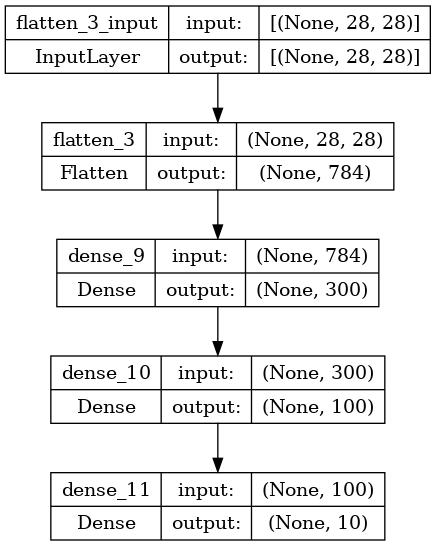

In [48]:
# Visualize the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [50]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])


In [51]:
#Train the model
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7085 - accuracy: 0.7691 - val_loss: 0.5159 - val_accuracy: 0.8246
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4846 - accuracy: 0.8304 - val_loss: 0.4865 - val_accuracy: 0.8396
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4437 - accuracy: 0.8447 - val_loss: 0.4180 - val_accuracy: 0.8574
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4173 - accuracy: 0.8549 - val_loss: 0.4058 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3989 - accuracy: 0.8602 - val_loss: 0.3924 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3817 - accuracy: 0.8658 - val_loss: 0.3888 - val_accuracy: 0.8698
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3685 - accuracy: 0.8698 - val_loss: 0.3660 - val_accuracy:

In [52]:
# show the parameters of the model
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [53]:
# The all loss,accuracy , val loss and val acuracy for each epoch (as dictionary)
history.history

{'loss': [0.708454966545105,
  0.4845516085624695,
  0.4437408447265625,
  0.4173446297645569,
  0.3988955318927765,
  0.3816998302936554,
  0.36846184730529785,
  0.3565046191215515,
  0.34676113724708557,
  0.33612826466560364,
  0.3265644609928131,
  0.31956446170806885,
  0.3118667006492615,
  0.30466678738594055,
  0.29702335596084595,
  0.28958621621131897,
  0.28477415442466736,
  0.27931779623031616,
  0.2733498513698578,
  0.2695971727371216,
  0.263166606426239,
  0.25952422618865967,
  0.25393372774124146,
  0.24962960183620453,
  0.24405774474143982,
  0.24102520942687988,
  0.23745332658290863,
  0.23297040164470673,
  0.2288230061531067,
  0.22527451813220978],
 'accuracy': [0.7691090703010559,
  0.8303818106651306,
  0.8446727395057678,
  0.8548545241355896,
  0.8601636290550232,
  0.8658363819122314,
  0.8697636127471924,
  0.873090922832489,
  0.8773454427719116,
  0.8793818354606628,
  0.8845454454421997,
  0.8851090669631958,
  0.8873817920684814,
  0.891018152236938

<Axes: >

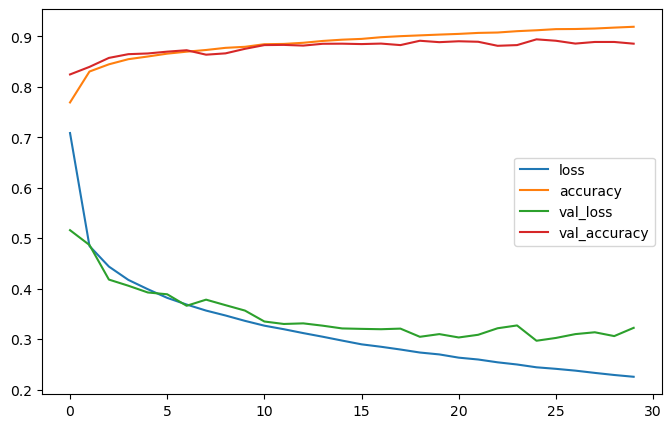

In [54]:
#If you create a Pandas DataFrame using this dictionary and call its plot() method, you get the learning curves 
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))  # make it a Dataframe object



In [55]:
# Evuluate the method (test it on the X_test and compare the predict with the y_test)
model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 65.5945 - accuracy: 0.8469


[65.5945053100586, 0.8468999862670898]

In [56]:
# 0,84 accuracy is not too bad.
# Next, we can use the model’s predict() method to make predictions on new instances. 
#Since we don’t have actual new instances, we will just use the first 3 instances of the test set:
X_new = X_test[:3]  # lets use first 3 instances of the test set  
y_predict = model.predict(X_new) 
y_predict.round(2)
# for each instance the model estimates one probability per class, from class 0 to class 9.

1/1 [==============================] - 0s 57ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
# If you only care about the class with the highest estimated probability (even if that probability is quite low) 
# then you can use the np.argmax() method instead:
import numpy as np 
y_pred = model.predict(X_new)  #Prediction
y_pred_classes = np.argmax(y_pred, axis=1) # get the index
y_pred_classes

# array([9, 2, 1]) means that first instance belongs to 9th class,second instance belongs to 2nd class and third instance belongs to 1st class

1/1 [==============================] - 0s 20ms/step


array([9, 2, 1])

In [58]:
# and see with the class names
np.array(class_names)[y_pred_classes]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')